<a href="https://colab.research.google.com/github/SoukainaTariki/Licence-Plate-Recognition-And-Access-Control/blob/main/LPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Provided you already have NumPy, SciPy, Matplotlib, and OpenCV already installed, the imutils package is completely pip-installable

In [ ]:
!pip install NumPy

In [ ]:
!pip install SciPy

In [ ]:
!pip install Matplotlib

In [ ]:
!pip install imutils

In [ ]:
!pip install --upgrade easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 22.1 MB/s eta 0:00:00


In [ ]:
!pip install git+https://github.com/JaidedAI/EasyOCR.git

  Cloning https://github.com/JaidedAI/EasyOCR.git to /tmp/pip-req-build-eu23cq0x
  Running command git clone --filter=blob:none --quiet https://github.com/JaidedAI/EasyOCR.git /tmp/pip-req-build-eu23cq0x
  Resolved https://github.com/JaidedAI/EasyOCR.git to commit c999505ef6b43be1c4ee36aa04ad979175178352
  Preparing metadata (setup.py) ... done


In [ ]:
import easyocr
reader = easyocr.Reader(['fr','en']) # this needs to run only once to load the model into memory
result = reader.readtext('/content/drive/MyDrive/LPR/data3/automobile-418879_1920.jpg')

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
reader.readtext('/content/drive/MyDrive/LPR/data3/car-6366999_1920.jpg', detail = 0)

['BP - 199 - SN']

In [ ]:
reader.readtext('/content/drive/MyDrive/LPR/data3/carm - Copy.jpg', detail = 0)

['22635| ^ |']

In [ ]:
reader.readtext('/content/drive/MyDrive/LPR/data3/automobile-1846297_1920.jpg', detail = 0)

['BG',
 'B',
 '2228 HM',
 'www mngauto mobilen bg',
 'MRG AUTO',
 'Bapua 0895 47 88']

In [ ]:
result = reader.readtext('/content/drive/MyDrive/LPR/data3/automobile-418879_1920.jpg')
result

[[[[281, 759], [323, 759], [323, 801], [281, 801]], '٨', 0.5138192933446248],
 [[[173, 857], [305, 857], [305, 949], [173, 949]],
  '٧٥٧X',
  0.3797610104084015],
 [[[301.9308939388298, 869.0573136311172],
   [446.48031961081807, 897.8182488977392],
   [426.0691060611702, 981.9426863688828],
   [281.51968038918193, 953.1817511022608]],
  '9570',
  0.4030897915363312]]

In [ ]:
reader = easyocr.Reader(["ar","fa","ur","ug","en"])
result = reader.readtext('/content/drive/MyDrive/LPR/data3/carm - Copy.jpg')
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[[[[863, 449], [1081, 449], [1081, 509], [863, 509]],
  '| / د/ 22839',
  0.09652954542285762]]

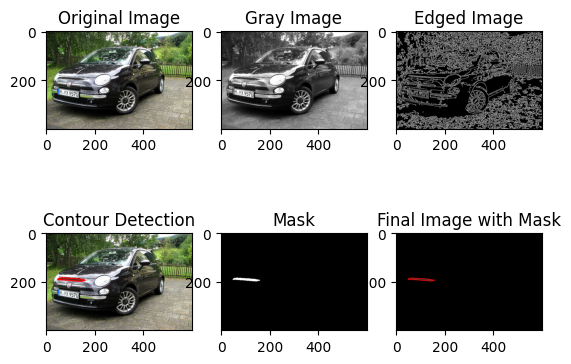

In [ ]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/LPR/data3/automobile-418879_1920.jpg', cv2.IMREAD_COLOR)
img = cv2.resize(img, (600, 400)) if img is not None else print("Image not loaded.")

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 13, 15, 15)

plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Gray Image')

edged = cv2.Canny(gray, 30, 200)

plt.subplot(2, 3, 3)
plt.imshow(edged, cmap='gray')
plt.title('Edged Image')

contours = imutils.grab_contours(cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE))
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
screenCnt = next((c for c in contours if len(cv2.approxPolyDP(c, 0.018 * cv2.arcLength(c, True), True)) == 4), None)

detected = 1 if screenCnt is not None else 0

if detected:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Contour Detection')

mask = cv2.drawContours(np.zeros(gray.shape, np.uint8), [screenCnt], 0, 255, -1)

plt.subplot(2, 3, 5)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

new_image = cv2.bitwise_and(img, img, mask=mask)

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.title('Final Image with Mask')

plt.show()


In [ ]:
reader.readtext(new_image, detail = 0)

[]

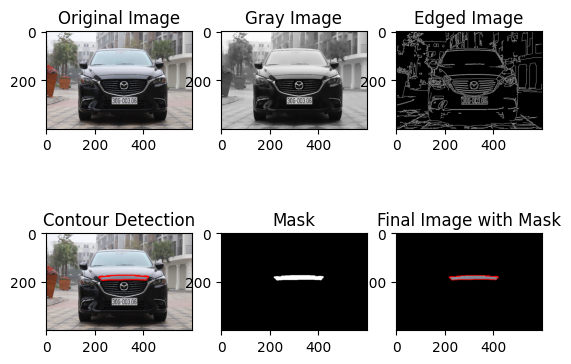

In [ ]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/LPR/data3/car-6122177_1920.jpg', cv2.IMREAD_COLOR)
img = cv2.resize(img, (600, 400)) if img is not None else print("Image not loaded.")

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 13, 15, 15)

plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Gray Image')

edged = cv2.Canny(gray, 30, 200)

plt.subplot(2, 3, 3)
plt.imshow(edged, cmap='gray')
plt.title('Edged Image')

contours = imutils.grab_contours(cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE))
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
screenCnt = next((c for c in contours if len(cv2.approxPolyDP(c, 0.018 * cv2.arcLength(c, True), True)) == 4), None)

detected = 1 if screenCnt is not None else 0

if detected:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Contour Detection')

mask = cv2.drawContours(np.zeros(gray.shape, np.uint8), [screenCnt], 0, 255, -1)

plt.subplot(2, 3, 5)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

new_image = cv2.bitwise_and(img, img, mask=mask)

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.title('Final Image with Mask')

plt.show()


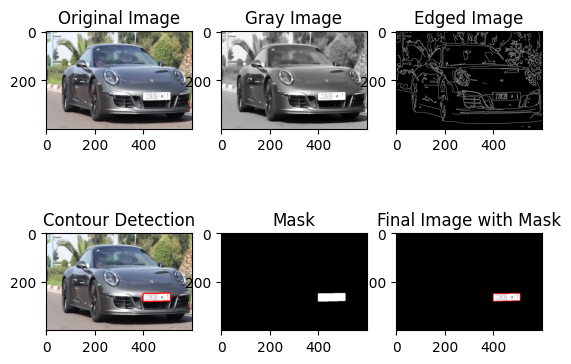

In [ ]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/LPR/data3/carm - Copy.jpg', cv2.IMREAD_COLOR)
img = cv2.resize(img, (600, 400)) if img is not None else print("Image not loaded.")

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 13, 15, 15)

plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Gray Image')

edged = cv2.Canny(gray, 30, 200)


plt.subplot(2, 3, 3)
plt.imshow(edged, cmap='gray')
plt.title('Edged Image')

contours = imutils.grab_contours(cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE))
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
screenCnt = next((c for c in contours if len(cv2.approxPolyDP(c, 0.018 * cv2.arcLength(c, True), True)) == 4), None)

detected = 1 if screenCnt is not None else 0

if detected:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Contour Detection')

mask = cv2.drawContours(np.zeros(gray.shape, np.uint8), [screenCnt], 0, 255, -1)

plt.subplot(2, 3, 5)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

new_image = cv2.bitwise_and(img, img, mask=mask)

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.title('Final Image with Mask')

plt.show()


In [ ]:
reader.readtext(new_image, detail = 0)

['| د 120٥9']